In [1]:
#Libs import
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn.metrics import silhouette_score
from fcmeans import FCM

In [8]:
#Dataset import
df = pd.read_csv('D:/Python_Projects/Clustering/dataset/Beer.csv')
df.head()

,ID,Name,Alcohol,Bitter,Sweet,Sour,Salty,Malty,review_overall
0,1,Amber,9,47,74,33,0,111,3.85
1,2,Double Bag,18,33,55,16,0,84,4.03
2,3,Long Trail Ale,6,42,43,11,0,62,3.83
3,4,Doppelsticke,31,47,101,18,1,119,4.01
4,5,Sleigh'r Dark Doüble Alt Ale,26,44,45,9,1,95,3.82


In [9]:
df.rename(index=str, columns={'review_overall': 'Review'}, inplace=True)
df.head()

,ID,Name,Alcohol,Bitter,Sweet,Sour,Salty,Malty,Review
0,1,Amber,9,47,74,33,0,111,3.85
1,2,Double Bag,18,33,55,16,0,84,4.03
2,3,Long Trail Ale,6,42,43,11,0,62,3.83
3,4,Doppelsticke,31,47,101,18,1,119,4.01
4,5,Sleigh'r Dark Doüble Alt Ale,26,44,45,9,1,95,3.82


In [10]:
df.describe(include='all') #Values description

,ID,Name,Alcohol,Bitter,Sweet,Sour,Salty,Malty,Review
count,3197.000000,3197,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000
unique,NaN,3066,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Oktoberfest,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1599.000000,NaN,17.055990,36.364404,58.270879,33.145449,1.017204,75.330935,3.747695
std,923.038732,NaN,17.331334,25.791152,34.281310,35.780172,2.132651,39.909338,0.444272
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.140000
25%,800.000000,NaN,6.000000,17.000000,33.000000,11.000000,0.000000,45.000000,3.570000
50%,1599.000000,NaN,11.000000,31.000000,54.000000,22.000000,0.000000,73.000000,3.830000
75%,2398.000000,NaN,22.000000,52.000000,77.000000,42.000000,1.000000,103.000000,4.030000


C:\Users\sneda\anaconda3\envs\PythonGPU\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


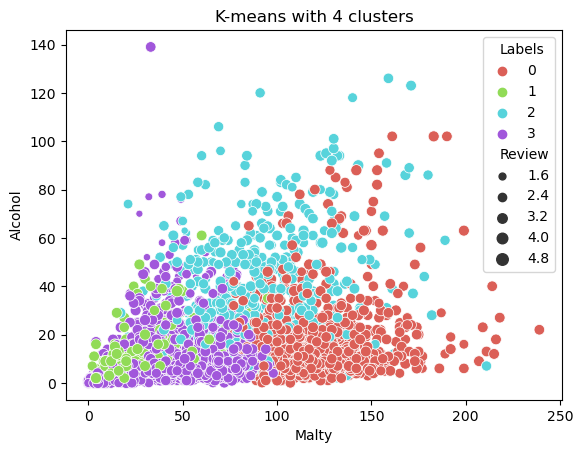

In [32]:
#K-means
X = df.drop(['ID', 'Name'], axis=1)
km = KMeans(n_clusters=4).fit(X)
X['Labels'] = km.labels_

sns.scatterplot(x=X['Malty'], y=X['Alcohol'], hue=X['Labels'], size=X['Review'], palette=sns.color_palette('hls', 4))

plt.title('K-means with 4 clusters')
plt.show()

In [33]:
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.3178632621690878


In [42]:
#C-means
X.drop(['Labels'], axis=1, inplace=True)
fcm = FCM(n_clusters=3)
fcm.fit(X.values)

fcm_centers = fcm.centers
fcm_labels = fcm.predict(X.values) 

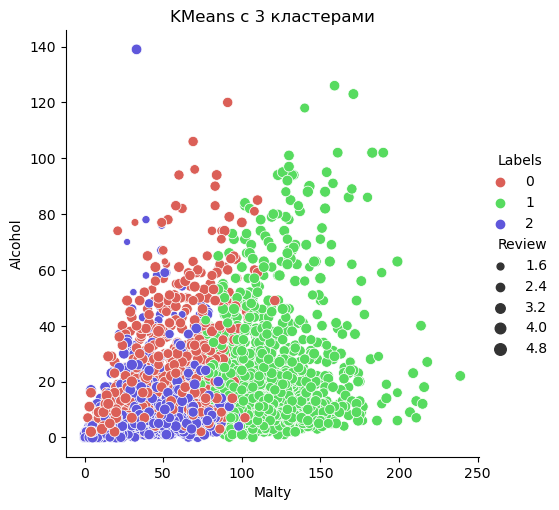

In [43]:
X['Labels'] = fcm_labels

sns.relplot(x='Malty', y='Alcohol', hue='Labels', 
            size='Review', data=X, palette = sns.color_palette('hls', 3)) 

plt.title('KMeans c 3 кластерами')
plt.show()

In [44]:
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.29982077293684667


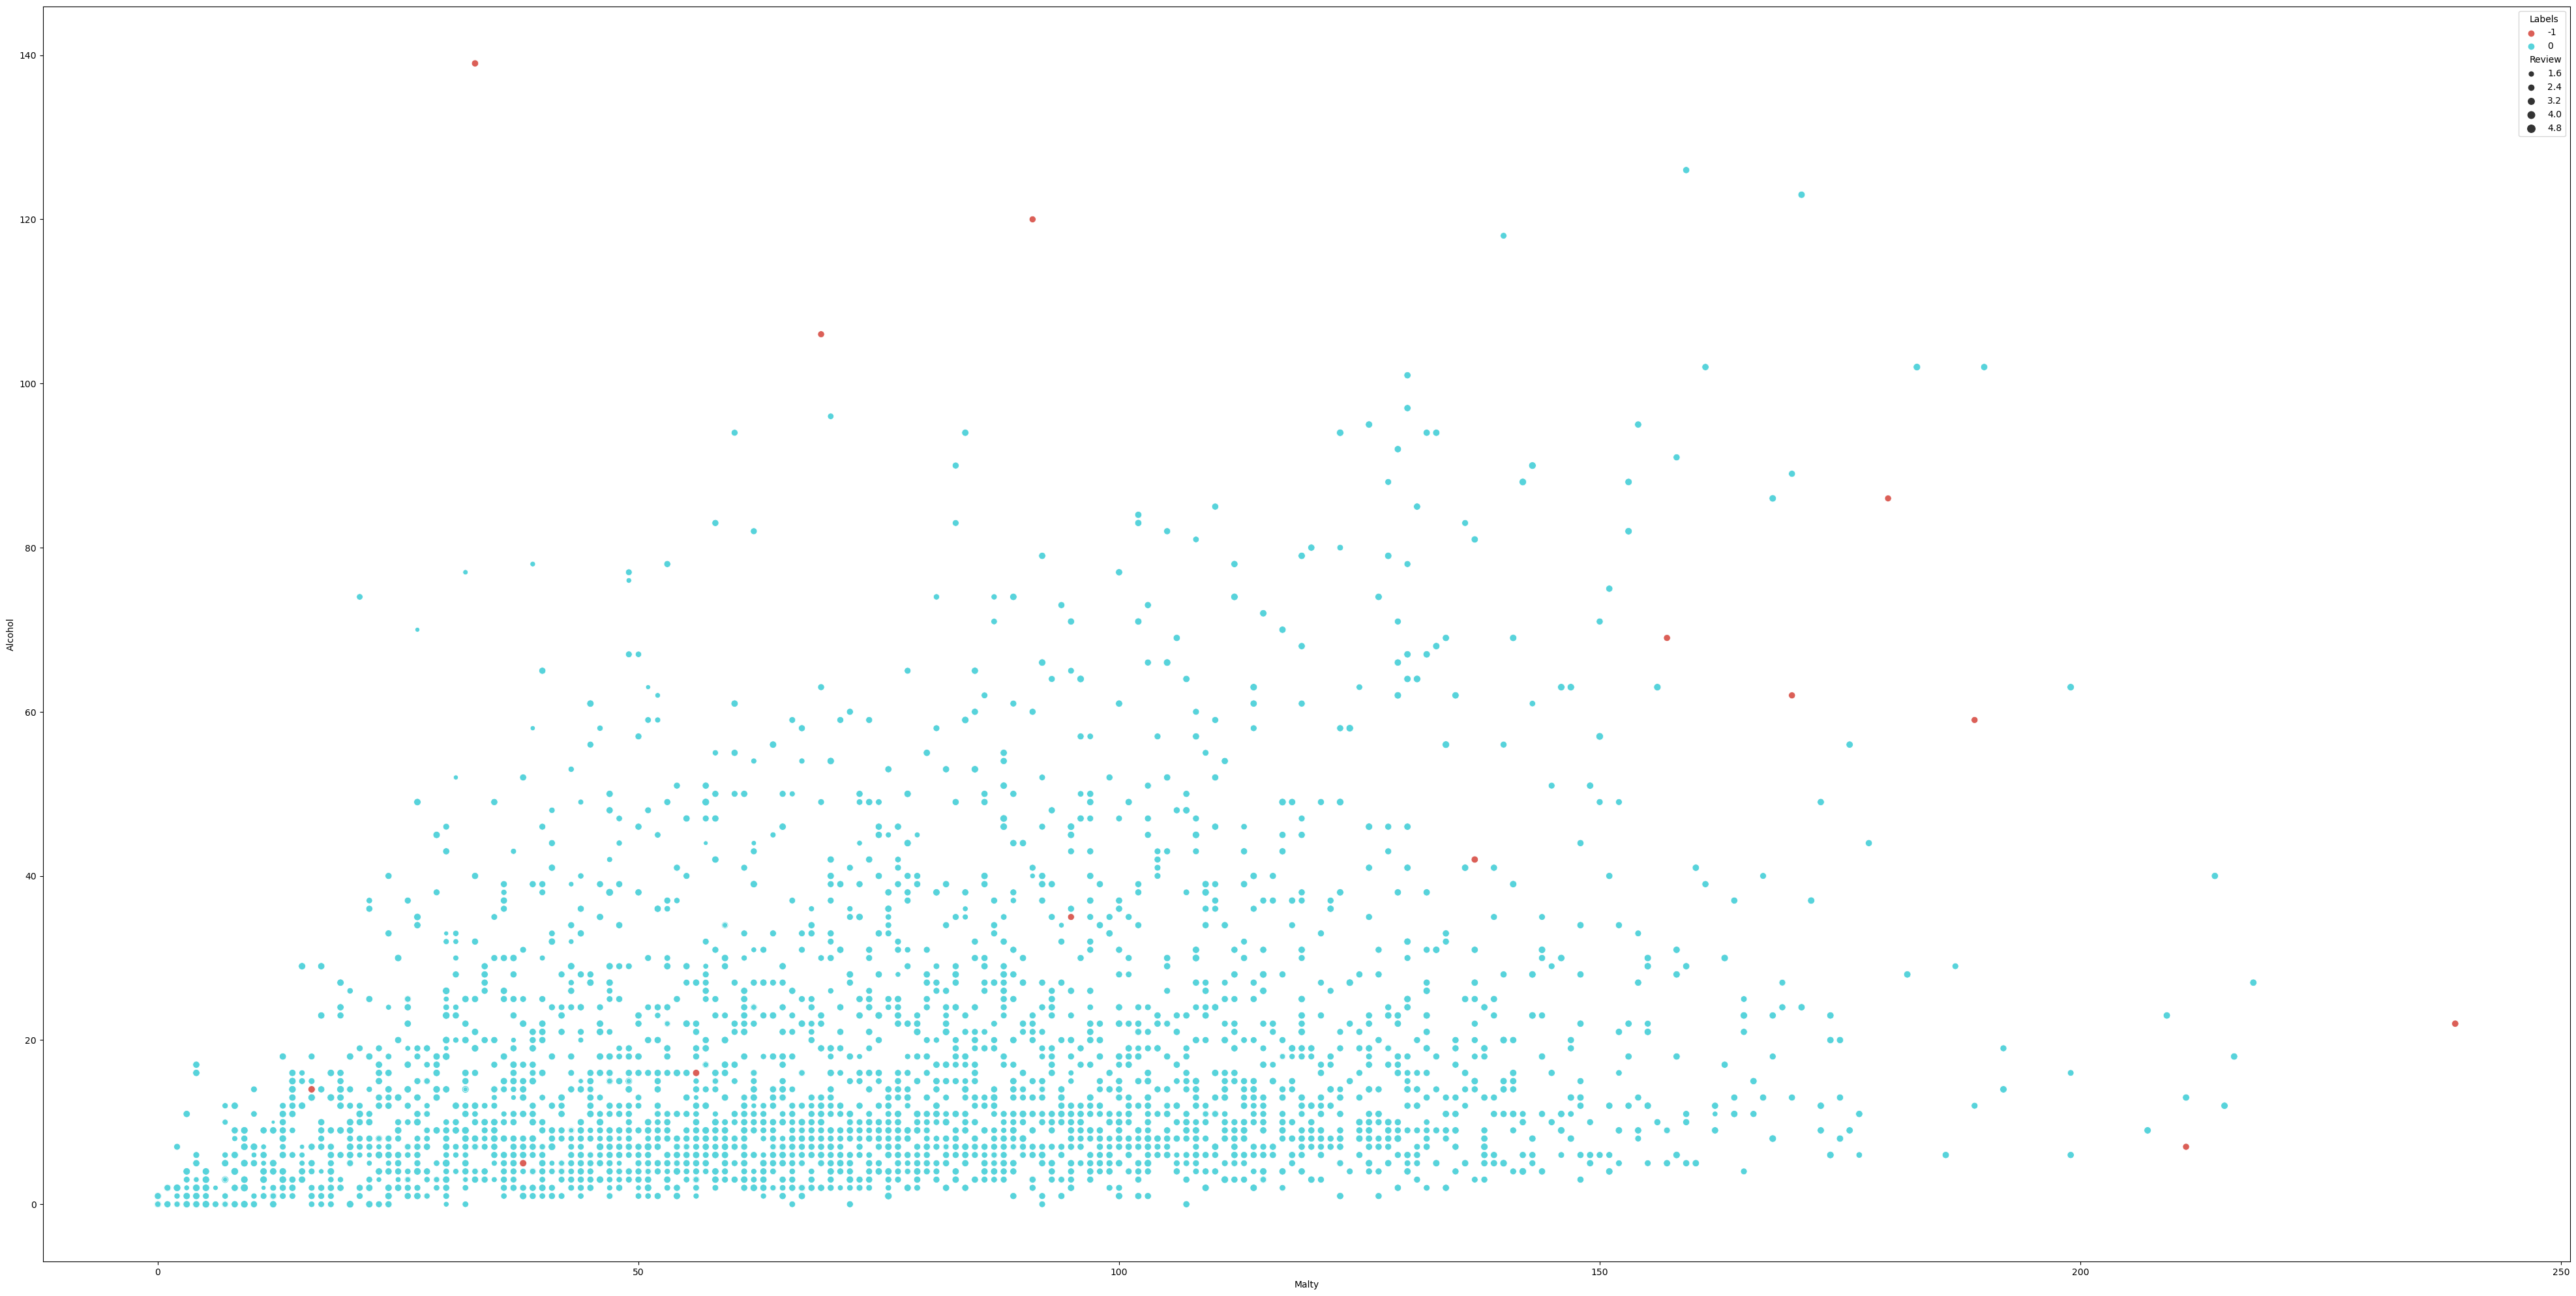

In [60]:
#DBSCAN
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=50, min_samples=25).fit(X.drop(['Labels'], axis=1))

X['Labels'] = db.labels_
plt.figure(figsize=(50, 25))
sns.scatterplot(x=X['Malty'], y=X['Alcohol'], hue=X['Labels'], size=X['Review'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.show()


In [61]:
print("Silhouette score: {}".format(silhouette_score(X.drop(['Labels'], axis=1), X.Labels)))

Silhouette score: 0.5186445029362174
